# Hisobotimizning maqsadi

Maqsadi: Yillar va/yoki ish haqi bo'yicha data sohasidagi mutaxassislarning soha va level lari bo'yicha tahlili. Kompaniya hajmi bo'yicha va boshqa tahlillar

Kim uchun: Qiziqish bildirganlar uchun

Hisobot qanday savollarga javob berish kerak: Hozirda qaysi sohada ish haqi yuqori va qaysi mutaxassisga talab katta?


## Kutubxonalarni chaqirib olamiz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Ma'lumotlarni yeg'ish va tayyorlash

In [2]:
salary = pd.read_csv("Dataset salary 2024.csv")
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


### Quyidagi ustunlarni olib tashlaymiz yoki filtrlab olamiz:

"salary", "salary_currency"  : Bu yerda ish haqi har hil davlatlarning valyutasida berilgan. Bizga "salary in usd" bitta AQSh dollari valyutasidagi ish haqi yetadi.

"employment_type" : FT(Full time - To'liq ish vaqt) ishlaydiganlar juda ham ko'pchiligini tashkil etadi. Shu sababli oldin filtrlab olamiz (outlierlar paydo bo'lishi xavfini kamaytirish uchun), keyin drop qilib yuboramiz.

"company_location" : US(AQSh) da ishlaydiganlar juda ham ko'pchiligini tashkil etadi. Shu sababli oldin filtrlab olamiz (outlierlar paydo bo'lishi xavfini kamaytirish uchun), keyin drop qilib yuboramiz. Sababi hammasi Aqshda ishlaydiganlarni kuzatamiz

"employee_rezidence" : Bu yerda ham yuqoridagi sabablarga ko'ra filtrlab olamiz va drop qilamiz.


#### ko'rish uchun

In [3]:
salary["employment_type"].value_counts()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [4]:
value_counts = salary["company_location"].value_counts()
value_counts[value_counts > 50]

company_location
US    14518
GB      694
CA      455
ES      133
DE      105
FR       65
IN       63
AU       57
Name: count, dtype: int64

In [5]:
salary["employee_residence"].value_counts()

employee_residence
US    14467
GB      686
CA      453
ES      137
DE       98
      ...  
IQ        1
BG        1
JE        1
RS        1
LU        1
Name: count, Length: 88, dtype: int64

#### Kod

In [6]:
salary = salary[salary["employment_type"] == "FT"]
salary = salary[salary["company_location"] == "US"]
salary = salary[salary["employee_residence"] == "US"]
salary = salary.drop(["salary","salary_currency","employment_type","company_location","employee_residence"], axis = "columns")
salary

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size
0,2024,SE,AI Engineer,202730,0,M
1,2024,SE,AI Engineer,92118,0,M
2,2024,SE,Data Engineer,130500,0,M
3,2024,SE,Data Engineer,96000,0,M
4,2024,SE,Machine Learning Engineer,190000,0,M
...,...,...,...,...,...,...
16526,2021,MI,Applied Machine Learning Scientist,423000,50,L
16528,2021,SE,Data Specialist,165000,100,L
16529,2020,SE,Data Scientist,412000,100,L
16530,2021,MI,Principal Data Scientist,151000,100,L


# Doimo ishlash uchun Dataframe

In [7]:
salary

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size
0,2024,SE,AI Engineer,202730,0,M
1,2024,SE,AI Engineer,92118,0,M
2,2024,SE,Data Engineer,130500,0,M
3,2024,SE,Data Engineer,96000,0,M
4,2024,SE,Machine Learning Engineer,190000,0,M
...,...,...,...,...,...,...
16526,2021,MI,Applied Machine Learning Scientist,423000,50,L
16528,2021,SE,Data Specialist,165000,100,L
16529,2020,SE,Data Scientist,412000,100,L
16530,2021,MI,Principal Data Scientist,151000,100,L


# Ma'lumotlarni tahlil qilish va ko'rsatish. Kichik hisobotlarni yozish

## Scatter plot

Mendagi dataframe ma'lumotlarini scatter plot yaxshi aks ettirib bera olmaydi. Shuni inobatga olishingizni so'rayman

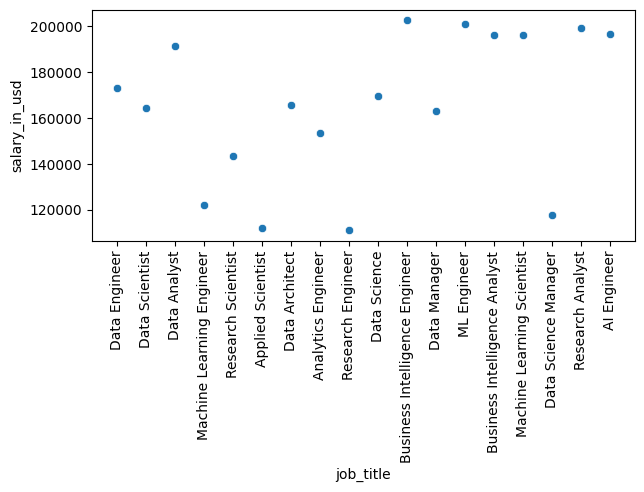

In [8]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_title = job_title_value_counts[job_title_value_counts > 100]
job = filtered_job_title.index
maosh_filtered = salary[salary["job_title"].isin(job)]
maosh = maosh_filtered.groupby("job_title")["salary_in_usd"].mean()
df_combined = pd.DataFrame({
    'job_title': job,
    'maosh': maosh
})
plt.figure(figsize=(7,3))
sns.scatterplot(x = job, y = maosh, data = df_combined)
plt.xticks(rotation = 90)
plt.show()

Lavozimlar jadvaldagi soniga qarab sortlangan. Qaysi lavozimda qancha maoshligini chiqarib bermoqda. Ushbu chizmada ma'lumotlar ko'p yoki kamligiga qarab turib kodda ularni qisqartirsa yoki kamaytirsa ham bo'ladi.  Bu chizmada hama narsa tushunarli deb o'ylayman. Quyida qisqartirilgan variyanti:

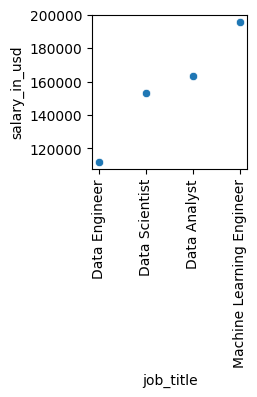

In [9]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_title = job_title_value_counts[job_title_value_counts > 500]
job = filtered_job_title.index
maosh_filtered = salary[salary["job_title"].isin(job)]
maosh = maosh_filtered.groupby("job_title")["salary_in_usd"].mean()
df_combined = pd.DataFrame({
    'job_title': job,
    'maosh': maosh
})
plt.figure(figsize=(2,2))
sns.scatterplot(x = job, y = maosh, data = df_combined)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Rudy\AppData\Local\Temp\ipykernel_16428\3458916817.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Rudy\AppData\Local\Temp\ipykernel_16428\3458916817.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Rudy\AppData\Local\Temp\ipykernel_16428\3458916817.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


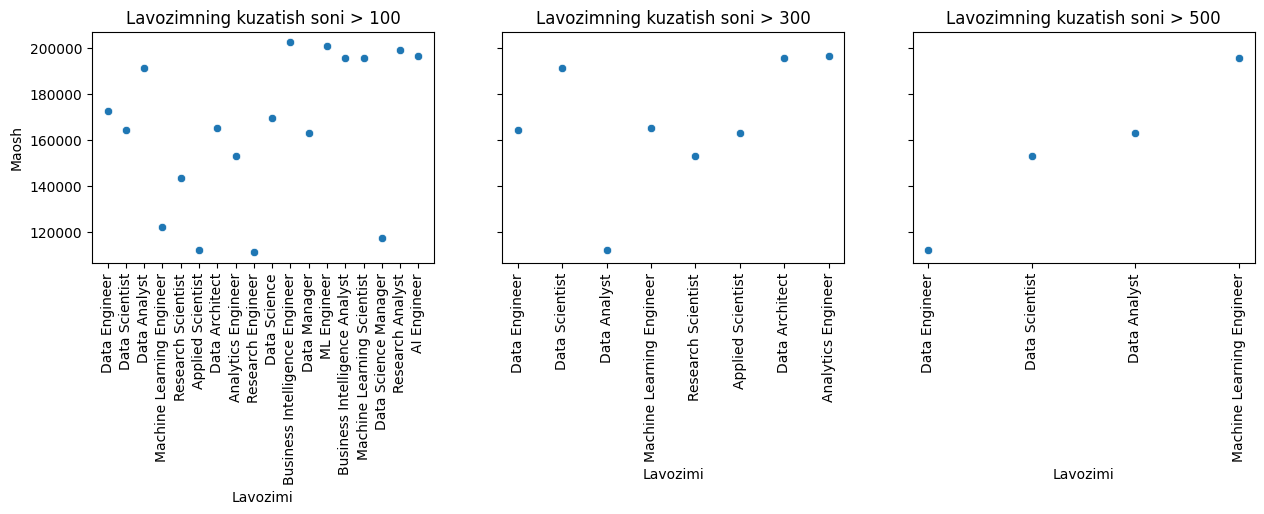

In [10]:
job_title_value_counts = salary["job_title"].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
soni = [100, 300, 500]
for ax, soni in zip(axes.flatten(), soni):
    filtered_job_title = job_title_value_counts[job_title_value_counts > soni]
    job = filtered_job_title.index
    maosh_filtered = salary[salary["job_title"].isin(job)]
    maosh = maosh_filtered.groupby("job_title")["salary_in_usd"].mean()
    df_combined = pd.DataFrame({
        'job_title': job,
        'maosh': maosh
    })
    
    sns.scatterplot(x = job, y = maosh, data = df_combined, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'Lavozimning kuzatish soni > {soni}')
    ax.set_xlabel('Lavozimi')
    ax.set_ylabel('Maosh')
plt.show()

## Count plot

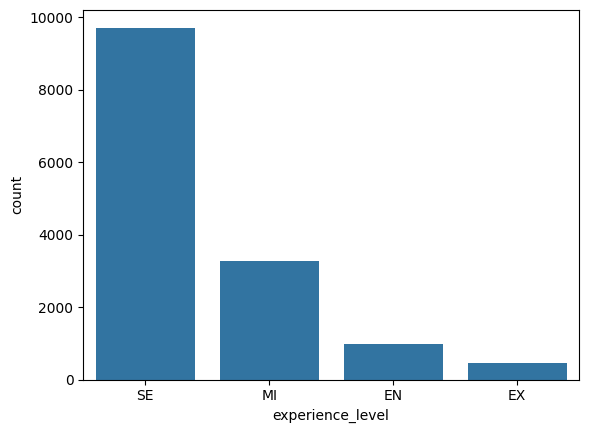

In [11]:
lavozimi = salary["experience_level"]
sns.countplot(x = lavozimi, data = salary)
plt.show()

Ushbu jadvalda asosan "Senior" lavozimidagilarning soni ko'rsatilgan. Bu jadvalga ko'p izoh shart emas deb o'ylayman.

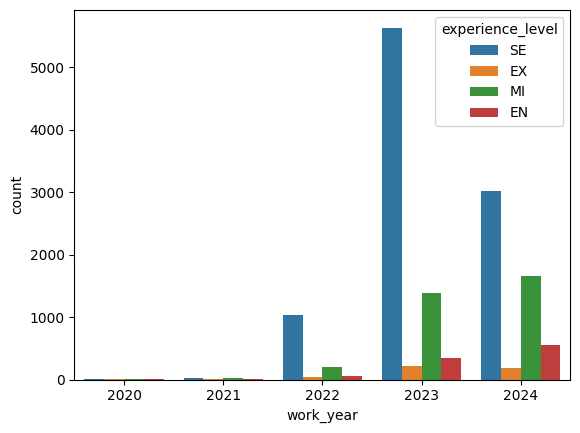

In [12]:
df = salary["work_year"]
sns.countplot(x = df, data = salary, hue = "experience_level")
plt.show()

Ma'lumotalar asosan 2022, 2023, 2024 yilda to'plangan.

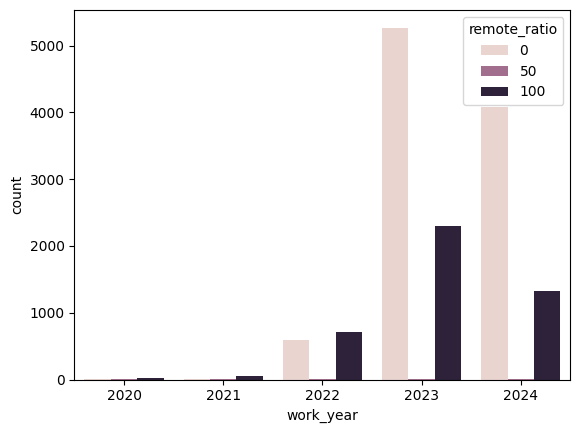

In [13]:
df = salary["work_year"]
sns.countplot(x = df, data = salary, hue = "remote_ratio")
plt.show()

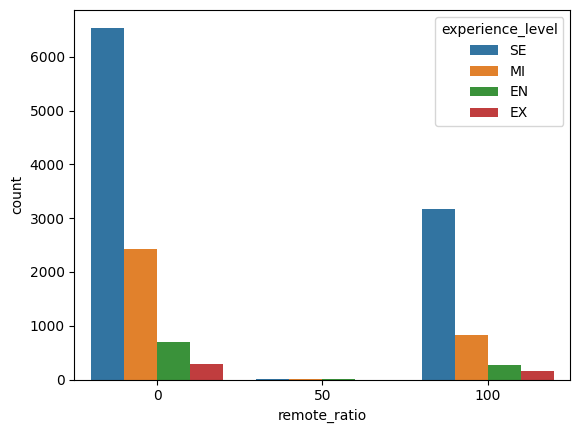

In [14]:
df = salary["remote_ratio"]
sns.countplot(x = df, data = salary, hue = "experience_level")
plt.show()

Mutaxassislarning ko'pchiligi ish joyida ishlasa ham, masofadan turib ishlaydiganlari ham ko'p ekan. Bemalol masofadan turib ham ishlasa bo'ladi ekan.

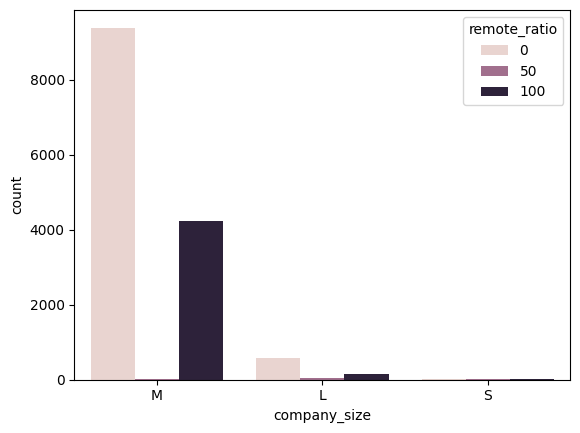

In [15]:
df = salary["company_size"]
sns.countplot(x = df, data = salary, hue = "remote_ratio")
plt.show()

Ma'lumotlar asosan O'rta kattalikdagi ("M") kompaniyalarning mutaxassislaridan olingan. Kichik ("S") korxonalarda IT mutaxassislari kam bo'lgani sababli tahlillarimiz shunga asoslangan bo'ladi. Katta("L") kompaniya mutaxassizlari haqida ma'lumotlar ham yetarli (kam emas).

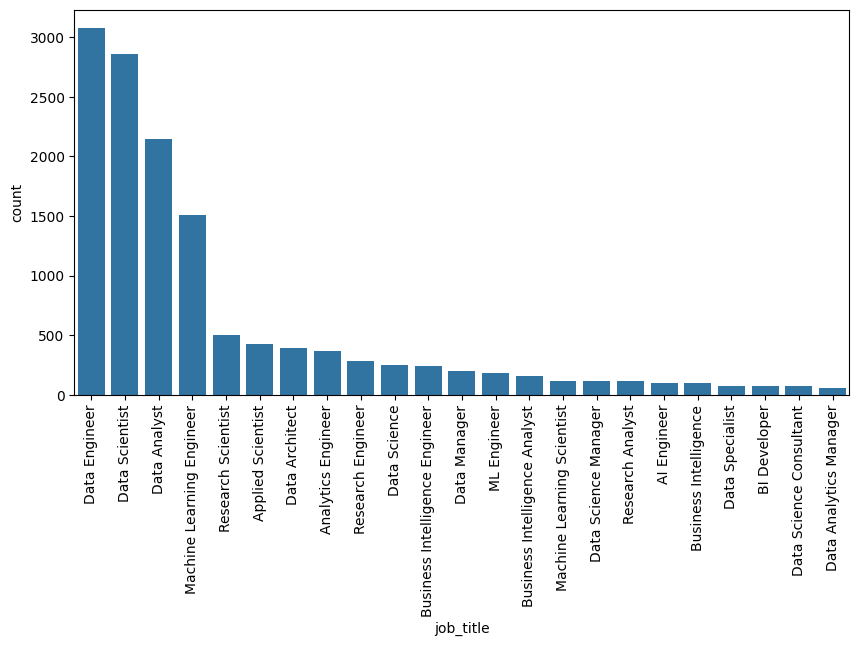

In [16]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_titles = job_title_value_counts[job_title_value_counts > 50]
jobs = filtered_job_titles.index
df = salary[salary["job_title"].isin(jobs)]
plt.figure(figsize=(10,5))
sns.countplot(x = df["job_title"], order = jobs, data=df)
plt.xticks(rotation = 90)
plt.show()

"X" o'qida lavozimlar hamda "Y" o'qida ularning soni. 50 tadan ko'plariniki. Kodda o'zgartirsa bo'ladi

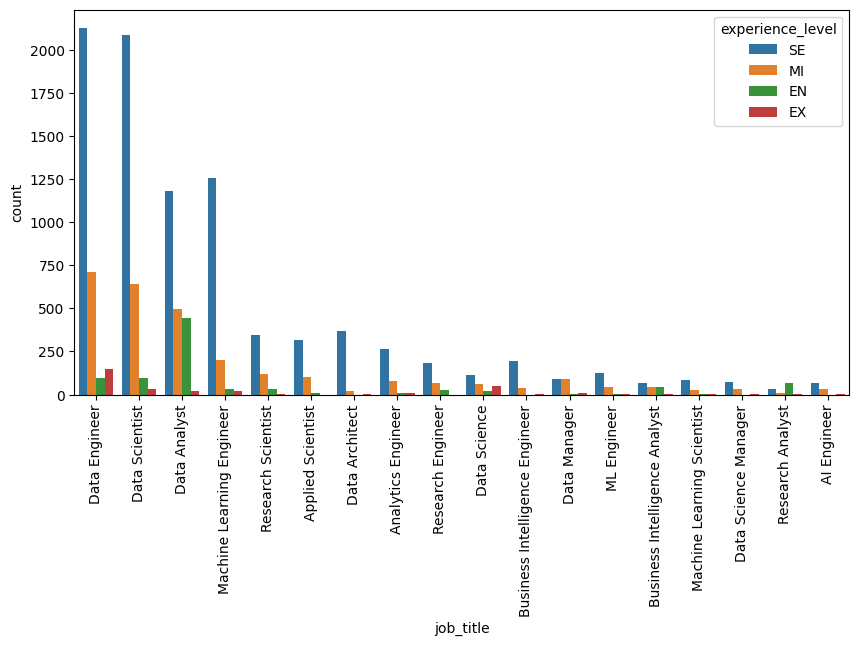

In [17]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_titles = job_title_value_counts[job_title_value_counts > 100]
jobs = filtered_job_titles.index
df = salary[salary["job_title"].isin(jobs)]
plt.figure(figsize=(10,5))
sns.countplot(x = df["job_title"], order = jobs, data=df, hue = "experience_level")
plt.xticks(rotation = 90)
plt.show()

## Relplot

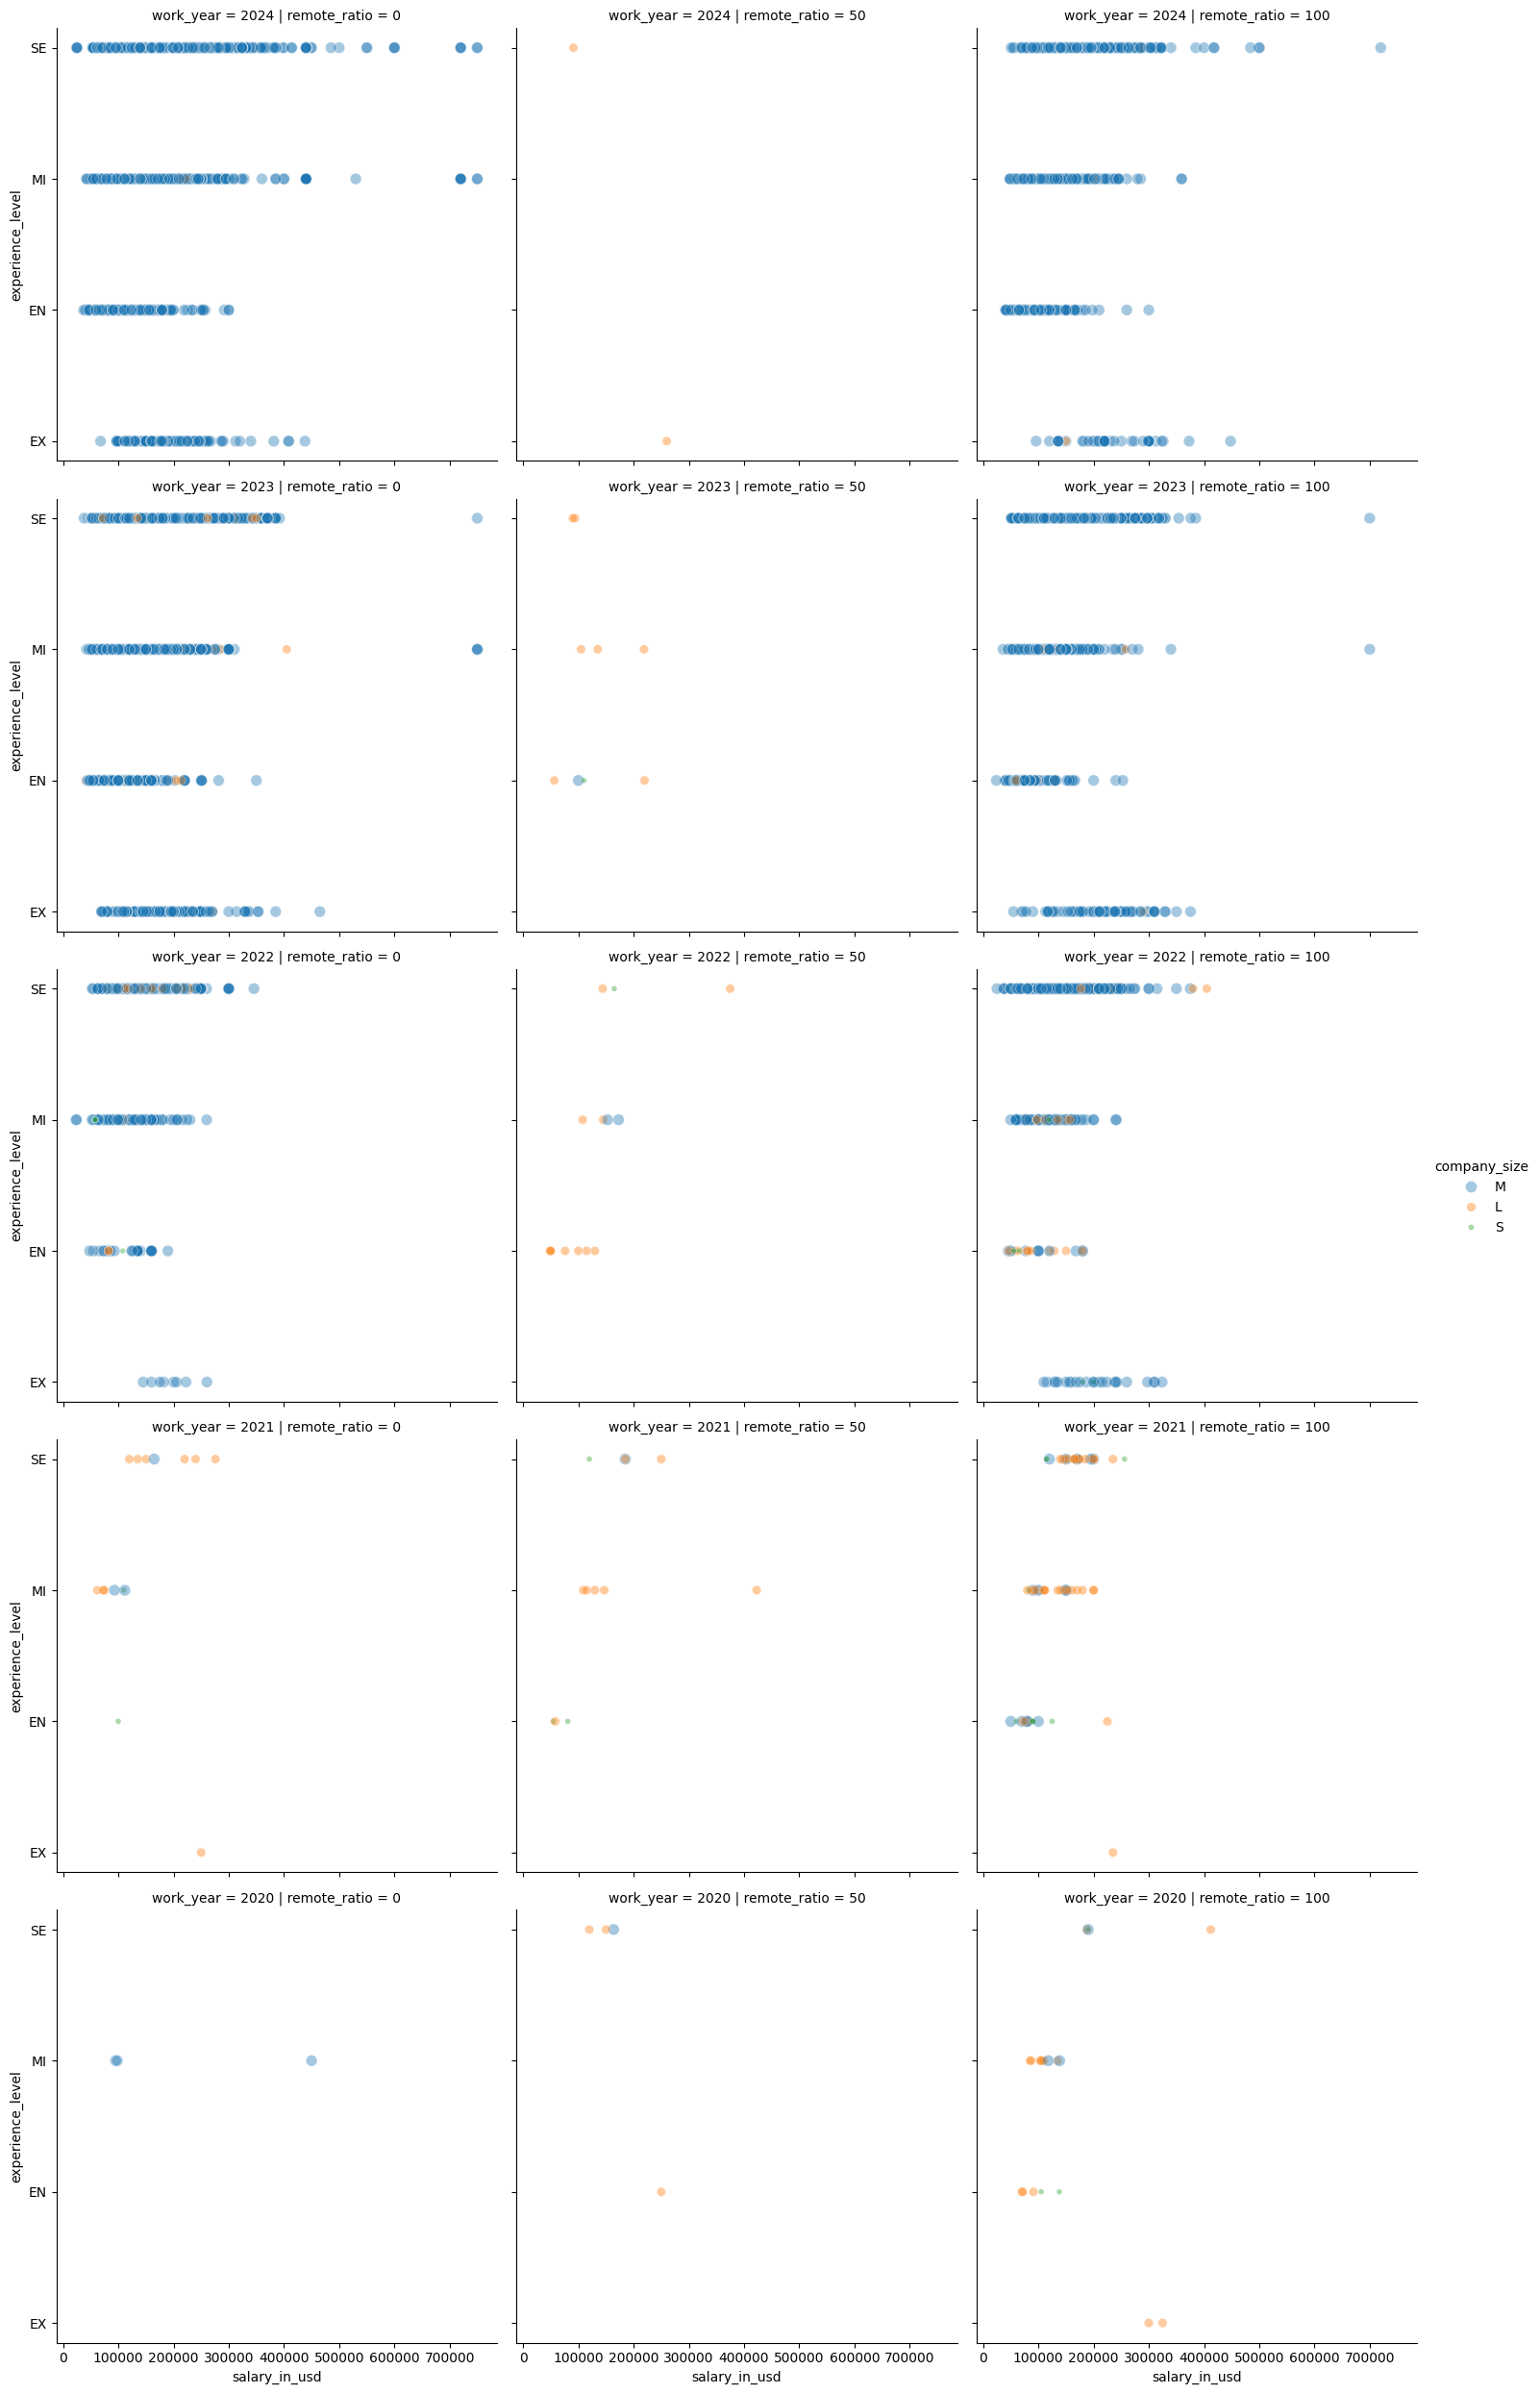

In [18]:
years=[2024,2023,2022,2021,2020]
sns.relplot(data = salary, x= "salary_in_usd", y = "experience_level",
            kind="scatter", col = "remote_ratio", row ="work_year", 
            row_order=years, size = "company_size", hue = "company_size",
            alpha = 0.4)
plt.show()

Yuqoridagi va oldingi darsdagi, ayniqsa line plot, box plot va count plot bilan tahlillarimiz aniqroq yoritib berilgan

## LinePlot

### Hamma "job_title" lar bo'yicha

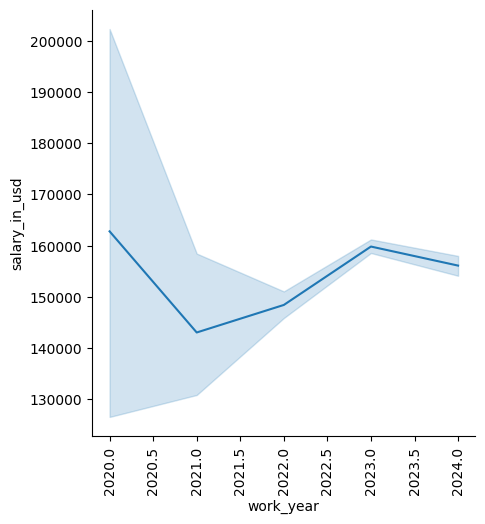

In [19]:
sns.relplot(x = "work_year", y = "salary_in_usd", data = salary, kind="line")
plt.xticks(rotation = 90)
plt.show()

### "N" tadan oshiq ma'lumot yig'ilgan "job_title" lar bo'yicha

<Figure size 2000x1400 with 0 Axes>

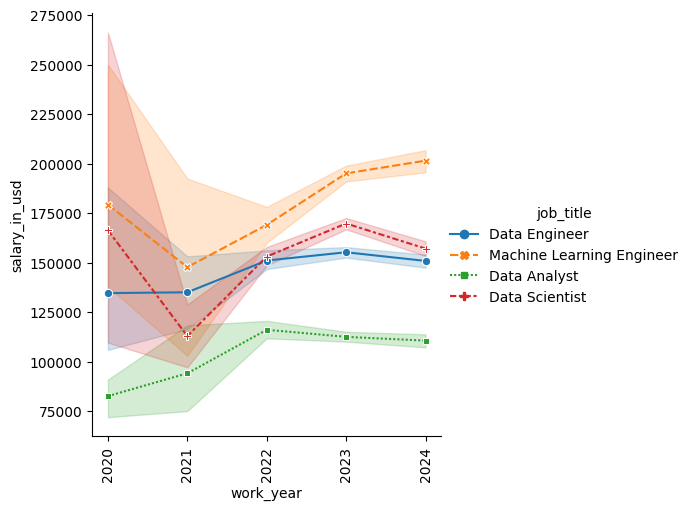

In [20]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_title = job_title_value_counts[job_title_value_counts > 500]
job = filtered_job_title.index
maosh_filtered = salary[salary["job_title"].isin(job)]
maosh = maosh_filtered.groupby("job_title")["salary_in_usd"].mean()
df = maosh_filtered
plt.figure(figsize=(20,14))
sns.relplot(x = "work_year", y = "salary_in_usd", data = df, kind="line",
            style = "job_title", hue = "job_title", markers=True)
plt.xticks(rotation = 90)
plt.show()

c:\Python\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 2000x1400 with 0 Axes>

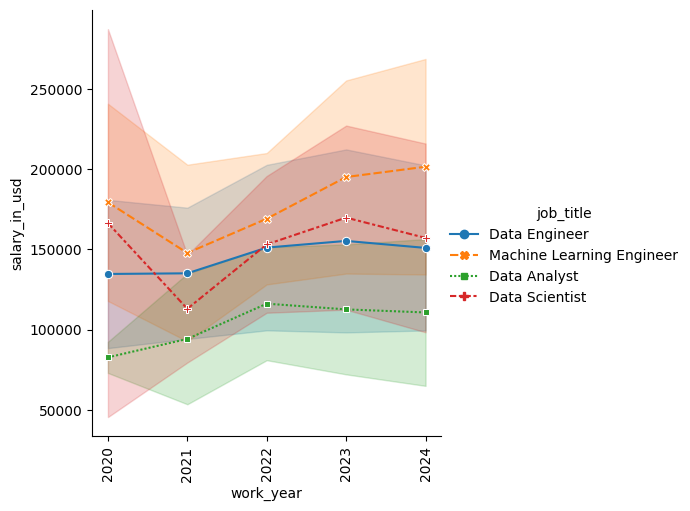

In [21]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_title = job_title_value_counts[job_title_value_counts > 500]
job = filtered_job_title.index
maosh_filtered = salary[salary["job_title"].isin(job)]
maosh = maosh_filtered.groupby("job_title")["salary_in_usd"].mean()
df = maosh_filtered
plt.figure(figsize=(20,14))
sns.relplot(x = "work_year", y = "salary_in_usd", data = df, kind="line",
            style = "job_title", hue = "job_title", markers=True, ci='sd')
plt.xticks(rotation = 90)
plt.show()

c:\Python\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 2000x1400 with 0 Axes>

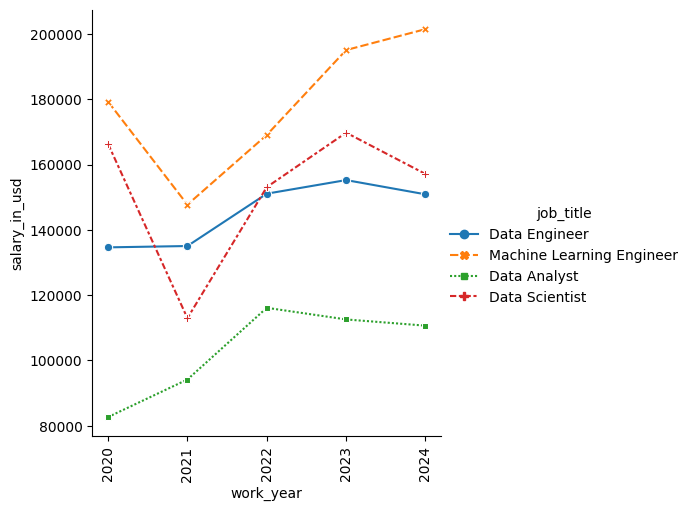

In [22]:
job_title_value_counts = salary["job_title"].value_counts()
filtered_job_title = job_title_value_counts[job_title_value_counts > 500]
job = filtered_job_title.index
maosh_filtered = salary[salary["job_title"].isin(job)]
maosh = maosh_filtered.groupby("job_title")["salary_in_usd"].mean()
df = maosh_filtered
plt.figure(figsize=(20,14))
sns.relplot(x = "work_year", y = "salary_in_usd", data = df, kind="line",
            style = "job_title", hue = "job_title", markers=True, ci=None)
plt.xticks(rotation = 90)
plt.show()

Ko'rib turibmizki:

Machine learning engineer lavozimi hozirda talabi va maoshi katta yo'nalishlardan biri ekan.

Data Engineer asosan stabil kasbligi ham ko'rinib turibti.

Data Analyst 2022 yilda talabi eng ko'p bo'lgan kasb bo'lib hozirda oxirgi 2 yil davomida pasayib bormoqda. Lekin stabilikni saqlab qolsa kerak. 

Data Scientist kasbi ham 2022, 2023 yillarda bir ko'tarilib 2024 yilda tushganligi ko'rinib turibti. Ammo bu kasbga ham talab tez orada ortadi degan umiddamiz.

2020, 2021 yillari Covid sababli kasblarning ko'pida talab kamayganini ham ko'rishimiz mumkin, Ammo Covid dan keyin Data va Computer yo'nalishi bo'yicha mutaxassilarga talab keskin ortgan desak mubolag'a bo'lmaydi.

Ammo bu hisobot bu maosh larning o'rtacha(mean) sidan kelib chiqqan, bu tahlillarda farq bo'lish ehtimoli yuqoridagi chizmalarda ko'rsatilgan.